In [65]:
from extract_text import TextExtractor

In [66]:
impressions="mild left pleural effusion, no cardiomegaly, no consolidation"
output_folder = "/media/volume/gen-ai-volume/MedSyn/results/text_embed"  
file_name='leftpleur_nocard_nocons.npy'

In [67]:
text_extractor = TextExtractor(resume_model="/media/volume/gen-ai-volume/MedSyn/models/test_run2")
text_extractor.run(impressions, output_folder, file_name)

BertForMaskedLM has generative capabilities, as `prepare_inputs_for_generation` is explicitly overwritten. However, it doesn't directly inherit from `GenerationMixin`. From 👉v4.50👈 onwards, `PreTrainedModel` will NOT inherit from `GenerationMixin`, and this model will lose the ability to call `generate` and other related functions.
  - If you're using `trust_remote_code=True`, you can get rid of this warning by loading the model with an auto class. See https://huggingface.co/docs/transformers/en/model_doc/auto#auto-classes
  - If you are the owner of the model architecture code, please modify your model class such that it inherits from `GenerationMixin` (after `PreTrainedModel`, otherwise you'll get an exception).
  - If you are not the owner of the model architecture class, please contact the model code owner to update it.
Some weights of CXRBertModel were not initialized from the model checkpoint at microsoft/BiomedVLP-CXR-BERT-specialized and are newly initialized: ['classifier.bias

<All keys matched successfully>
(1, 192, 768)
Saved to: /media/volume/gen-ai-volume/MedSyn/results/text_embed/leftpleur_nocard_nocons.npy
Saved rokens to: /media/volume/gen-ai-volume/MedSyn/results/text_embed/leftpleur_nocard_nocons_tokens.npy


In [68]:
from stage1 import run_diffusion_1
import accelerate
accelerate.state.AcceleratorState._shared_state.clear() # dirty hack to reset accelerator state
run_diffusion_1(input_folder="/media/volume/gen-ai-volume/MedSyn/results/text_embed", 
                output_folder= "/media/volume/gen-ai-volume/MedSyn/results/img_64_standard/leftpleur_nocard_nocons", 
                model_folder="/media/volume/gen-ai-volume/MedSyn/models/stage1", 
                attention_folder="/media/volume/gen-ai-volume/MedSyn/results/saliency_maps/leftpleur_nocard_nocons",
                dont_delete_folder="/media/volume/gen-ai-volume/MedSyn/results/img_64_standard",
                num_sample=1,
                tokenizer=text_extractor.tokenizer,
                noise_folder="/media/volume/gen-ai-volume/MedSyn/results/img_64_standard/saved_noise/leftpleur_nocard_nocons")

/home/exouser/MedsynBackend/src/stage1.py:1259: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.model.load_state_dict(torch.load(model_path, map_location=map_location), s

Tokens file missing for dont_delete.npy
found 2 text embedding files at /media/volume/gen-ai-volume/MedSyn/results/text_embed


/home/exouser/miniconda3/envs/medsyn-3-8/lib/python3.8/site-packages/accelerate/accelerator.py:479: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)


loading low-res model...
Pre-saved noise not found! Generating new fixed noise instead.
Debug: Cleared attention_maps, Length is now 0
Low Resolution:   0%|          | 0/51 [00:00<?, ?it/s]Debug: Collected 1 attention maps from mid_cross_attn1
Debug: Collected 1 attention maps from mid_cross_attn2
Debug: Collected 1 attention maps from mid_cross_attn3
Debug: Collected 1 attention maps from mid_cross_attn4
Debug: Total Attention Maps: 4
Low Resolution:   2%|▏         | 1/51 [00:00<00:14,  3.43it/s]Debug: Collected 1 attention maps from mid_cross_attn1
Debug: Collected 1 attention maps from mid_cross_attn2
Debug: Collected 1 attention maps from mid_cross_attn3
Debug: Collected 1 attention maps from mid_cross_attn4
Debug: Total Attention Maps: 4
Low Resolution:   4%|▍         | 2/51 [00:00<00:13,  3.53it/s]Debug: Collected 1 attention maps from mid_cross_attn1
Debug: Collected 1 attention maps from mid_cross_attn2
Debug: Collected 1 attention maps from mid_cross_attn3
Debug: Collected 1 a

In [5]:
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
import matplotlib.cm as cm

generated_filename = "leftpleur_nocard_nocons_sample_0.npy"
output_folder = "/media/volume/gen-ai-volume/MedSyn/results/img_64_standard/leftpleur_nocard_nocons"
image_path = os.path.join(output_folder, generated_filename)

generated_image = np.load(image_path)  # Shape: (C, D, H, W) or (C, num_slices, height, width)
print(f"Loaded image shape: {generated_image.shape}")  # Check image dimensions

Loaded image shape: (4, 64, 64, 64)


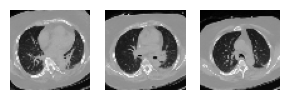

In [6]:
# Select slices for visualization
num_slices = generated_image.shape[2]  # Depth of the image (D)
selected_slices = [24, num_slices // 2, 40]  # Select three slices

plt.figure(figsize=(3, 3))

for i, slice_idx in enumerate(selected_slices):
    original_slice = generated_image[0, slice_idx, :, :]  # Extract original image slice
    
    # Ensure grayscale shape (H, W)
    if len(original_slice.shape) > 2:
        original_slice = original_slice[0]  # Take the first channel if multi-channel
    # Flip images upside down
    original_slice = np.flipud(original_slice)
    # attention_slice_resized = np.flipud(attention_slice_resized)
    # Overlay attention
    
    # ✅ Display Original Image & Heatmap Side by Side
    plt.subplot(3, len(selected_slices), i + 1)
    plt.imshow(original_slice, cmap="gray")
    plt.axis("off")

plt.tight_layout()
plt.show()

In [7]:
from scipy.ndimage import zoom
import numpy as np
import matplotlib.pyplot as plt
import os

Loaded generated images with shape: (4, 64, 64, 64)
Sample shape: (64, 64, 64)
Loaded heatmaps with shape: (64, 8, 8)
Final heatmap volume shape: (64, 64, 64)


<Figure size 2500x2000 with 0 Axes>

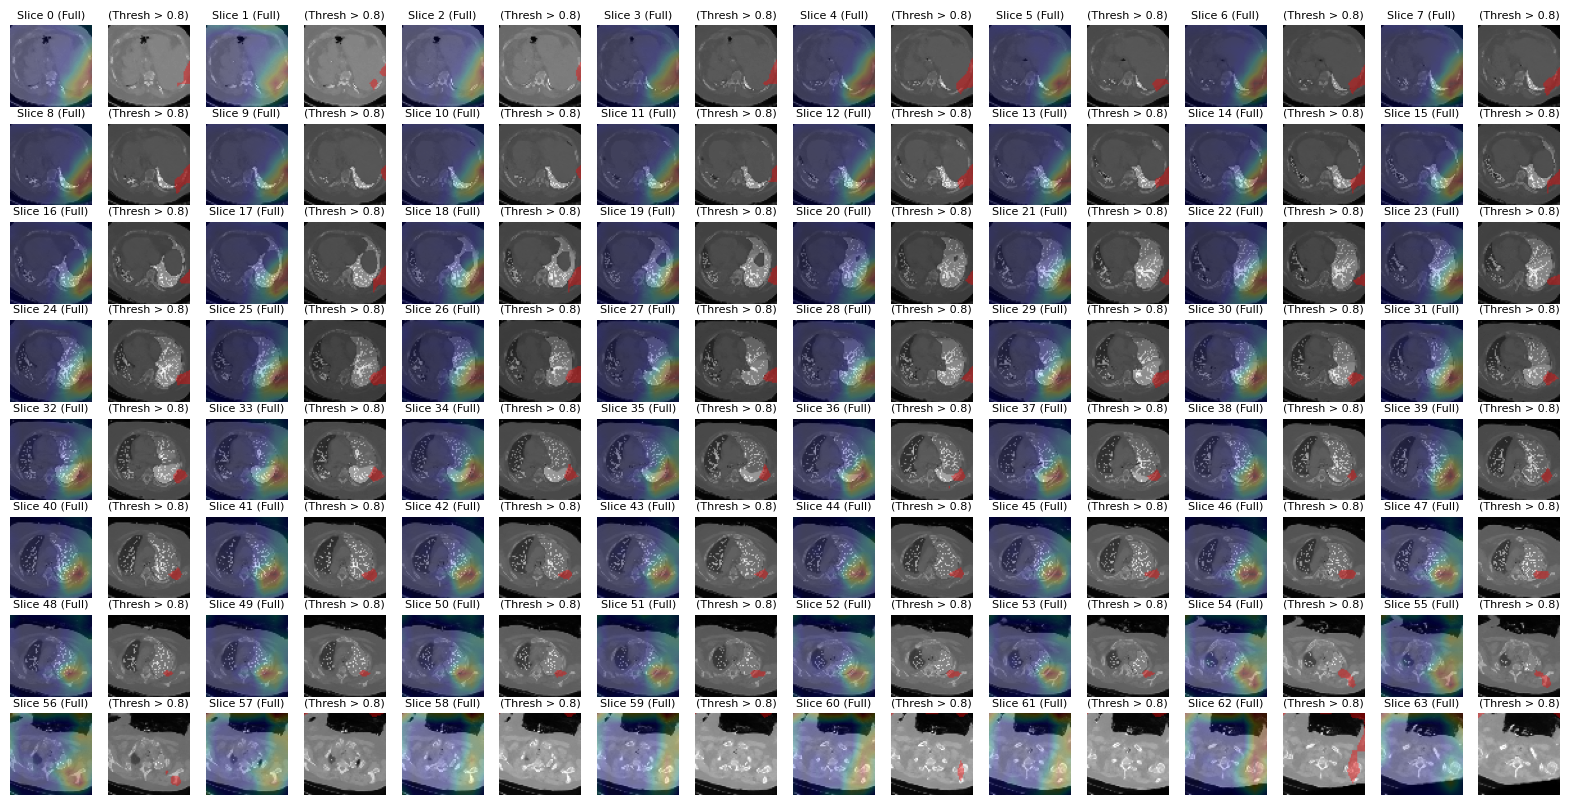

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import zoom

def normalize_image(image):
    image_min = image.min()
    image_max = image.max()
    return (image - image_min) / (image_max - image_min + 1e-8)

def overlay_heatmap_on_slices(volume, heatmap_volume, view='axial', n_rows=8, n_cols=8, threshold=0.5):
    if view == 'axial':
        slices = volume
        heatmap_slices = heatmap_volume
    elif view == 'coronal':
        slices = np.transpose(volume, (1, 0, 2))
        heatmap_slices = np.transpose(heatmap_volume, (1, 0, 2))
    elif view == 'sagittal':
        slices = np.transpose(volume, (2, 0, 1))
        heatmap_slices = np.transpose(heatmap_volume, (2, 0, 1))
    else:
        raise ValueError("Invalid view. Choose from 'axial', 'coronal', or 'sagittal'.")

    num_slices = slices.shape[0]
    total_plots = min(n_rows * n_cols, num_slices)  # Prevent index errors
    fig, axes = plt.subplots(n_rows, n_cols * 2, figsize=(20, 10))  # Twice the columns for comparison
    axes = axes.flatten()

    for idx in range(total_plots):
        slice_idx = idx  
        if slice_idx >= num_slices:
            axes[idx * 2].axis('off')
            axes[idx * 2 + 1].axis('off')
            continue

        image_slice = slices[slice_idx, :, :]
        image_slice_norm = normalize_image(image_slice)

        heatmap_slice = heatmap_slices[slice_idx, :, :]
        heatmap_slice_norm = normalize_image(heatmap_slice)

        # Plot full heatmap overlay (Left Column)
        axes[idx * 2].imshow(image_slice_norm, cmap='gray')
        axes[idx * 2].imshow(heatmap_slice_norm, cmap='jet', alpha=0.2)
        axes[idx * 2].set_title(f'Slice {slice_idx} (Full)', fontsize=8)
        axes[idx * 2].axis('off')

        # Plot thresholded red transparent overlay (Right Column)
        threshold_mask = heatmap_slice_norm > threshold
        red_mask = np.zeros((*heatmap_slice_norm.shape, 4))  # RGBA
        red_mask[..., 0] = 1  # Red channel
        red_mask[..., 3] = threshold_mask * 0.4  # Apply alpha where mask is True

        axes[idx * 2 + 1].imshow(image_slice_norm, cmap='gray')
        axes[idx * 2 + 1].imshow(red_mask)
        axes[idx * 2 + 1].set_title(f'(Thresh > {threshold})', fontsize=8)
        axes[idx * 2 + 1].axis('off')

    plt.tight_layout  # Adjust spacing
    plt.show()


image_data_path = image_path
heatmap_data_path = '/media/volume/gen-ai-volume/MedSyn/results/saliency_maps/leftpleur_nocard_nocons/leftpleur_nocard_nocons_sample_0_token_2_left_heatmaps.npy'

# Load the generated images
data = np.load(image_data_path)
print(f"Loaded generated images with shape: {data.shape}")

#add a dummy batch dimension
data_batched = np.expand_dims(data, axis=0)

# Average over channels if multiple channels exist
sample = data_batched[0].mean(axis=0)  # [frames, height, width]
num_frames, height, width = sample.shape
print(f"Sample shape: {sample.shape}")
sample_norm = normalize_image(sample)
heatmaps = np.load(heatmap_data_path)
print(f"Loaded heatmaps with shape: {heatmaps.shape}")


if heatmaps.shape[1] != height or heatmaps.shape[2] != width:
    resized_heatmaps = []
    for i in range(num_frames):
        heatmap_slice = heatmaps[i, :, :]  # e.g. (8, 8)
        heatmap_slice_norm = normalize_image(heatmap_slice)
        zoom_factors = (height / heatmap_slice.shape[0], width / heatmap_slice.shape[1])
        heatmap_resized = zoom(heatmap_slice_norm, zoom_factors, order=1)  # Bilinear interpolation
        resized_heatmaps.append(heatmap_resized)
    heatmap_volume = np.stack(resized_heatmaps, axis=0)  # (frames, height, width)
else:
    heatmap_volume = heatmaps

print(f"Final heatmap volume shape: {heatmap_volume.shape}")
view = 'axial'

# Flip image and heatmap volume upside-down
sample_norm_flipped = np.flip(sample_norm, axis=1)  # Flip vertically
heatmap_volume_flipped = np.flip(heatmap_volume, axis=1)  # Flip heatmap vertically

# Flip left/right
sample_norm_flipped = np.flip(sample_norm_flipped, axis=2)  # Flip horizontally
# heatmap_volume_flipped = np.flip(heatmap_volume_flipped, axis=2)  # Flip heatmap horizontally

plt.figure(figsize=(25, 20))
overlay_heatmap_on_slices(sample_norm_flipped, heatmap_volume_flipped, view='axial', n_rows=8, n_cols=8, threshold=0.8)

<Figure size 2500x2000 with 0 Axes>

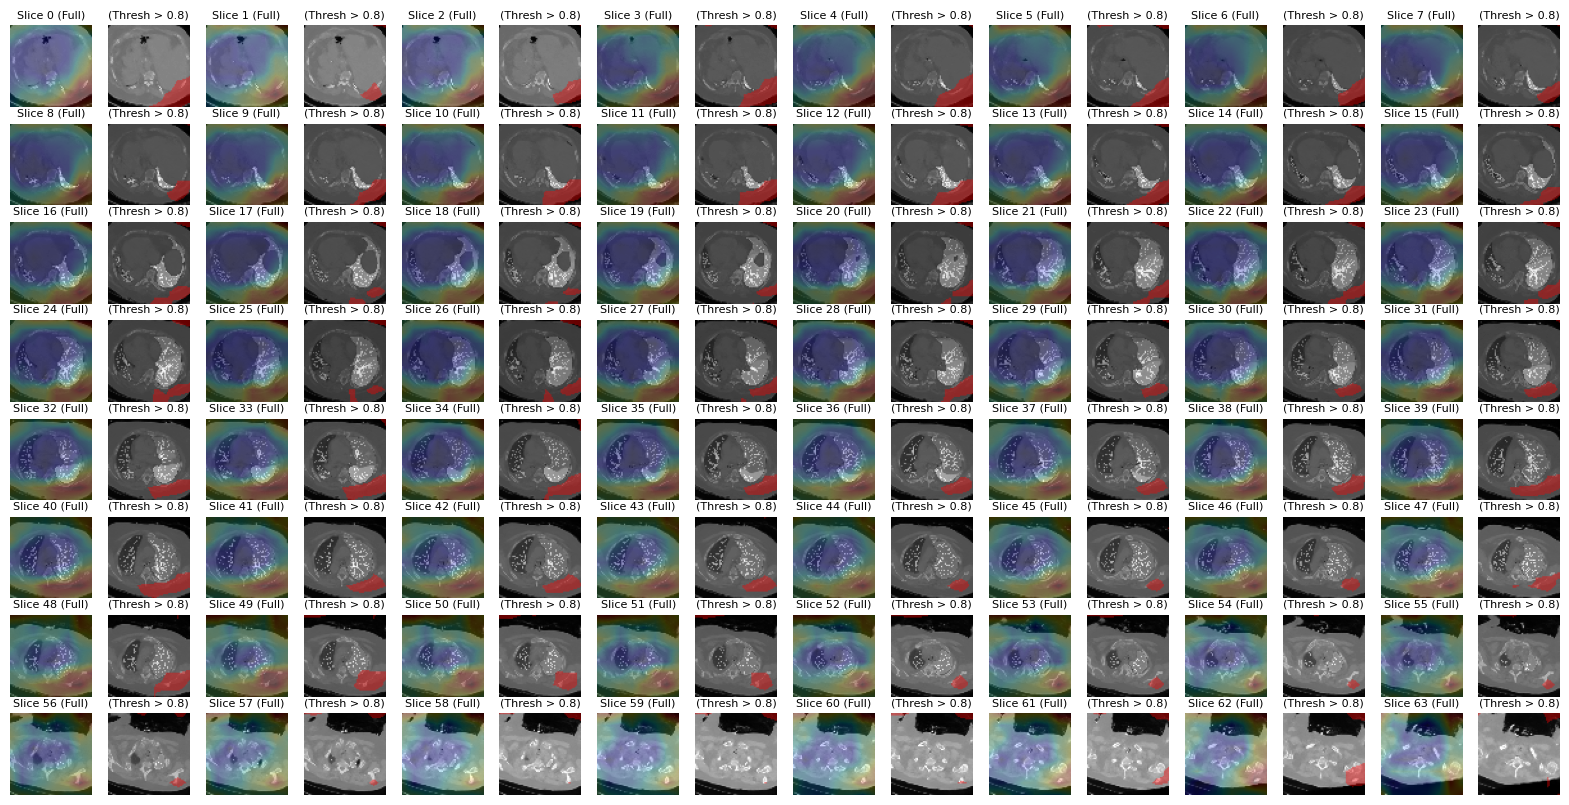

In [9]:
# **Function to Average Multiple Heatmaps**
def average_heatmaps_from_files(file_list, target_shape=None):
    accumulated_heatmap = None
    count = 0  

    for file in file_list:
        heatmap = np.load(file)
        heatmap = np.flip(heatmap, axis=1)  

        if target_shape and heatmap.shape != target_shape:
            zoom_factors = (
                target_shape[0] / heatmap.shape[0],
                target_shape[1] / heatmap.shape[1],
                target_shape[2] / heatmap.shape[2]
            )
            heatmap = zoom(heatmap, zoom_factors, order=1)  
        
        heatmap = normalize_image(heatmap)

        if accumulated_heatmap is None:
            accumulated_heatmap = np.zeros_like(heatmap)
        
        accumulated_heatmap += heatmap
        count += 1
    
    if count > 0:
        averaged_heatmap = accumulated_heatmap / count
    else:
        raise ValueError("No valid heatmaps were found.")

    return averaged_heatmap


# **Define Files to Average**
FILES_PATH = '/media/volume/gen-ai-volume/MedSyn/results/saliency_maps/'
folder_name = "leftpleur_nocard_nocons"

heatmap_files = [
    os.path.join(FILES_PATH, folder_name, file) for file in [
        "leftpleur_nocard_nocons_sample_0_token_1_mild_heatmaps.npy",
        "leftpleur_nocard_nocons_sample_0_token_2_left_heatmaps.npy",
        "leftpleur_nocard_nocons_sample_0_token_3_pleural_heatmaps.npy",
        "leftpleur_nocard_nocons_sample_0_token_4_effusion_heatmaps.npy"
    ]
]

# Compute averaged heatmap
combined_heatmap = average_heatmaps_from_files(heatmap_files, target_shape=sample.shape)
# combined_heatmap_flipped = np.flip(combined_heatmap, axis=1)

# **Visualize**
plt.figure(figsize=(25, 20))
overlay_heatmap_on_slices(sample_norm_flipped, combined_heatmap, view='axial', n_rows=8, n_cols=8, threshold=0.8)

<Figure size 2500x2000 with 0 Axes>

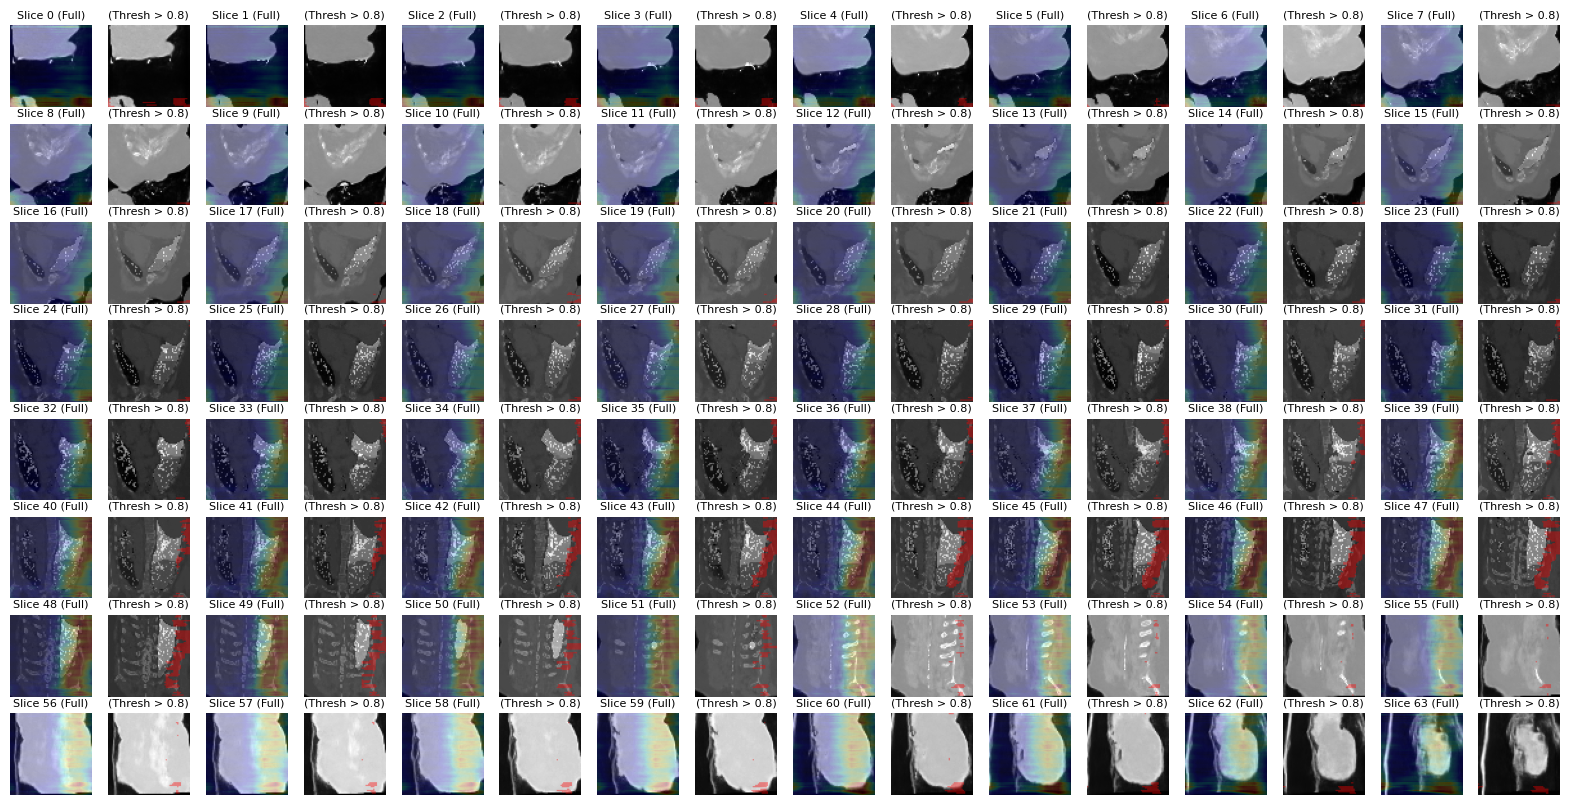

In [10]:
view = 'coronal'

plt.figure(figsize=(25, 20))
plt.suptitle(f"Overlay of CLS Heatmaps - View: {view.capitalize()}", fontsize=16)
overlay_heatmap_on_slices(sample_norm_flipped, heatmap_volume_flipped, view=view, n_rows=8, n_cols=8, threshold=0.8)

<Figure size 1500x1500 with 0 Axes>

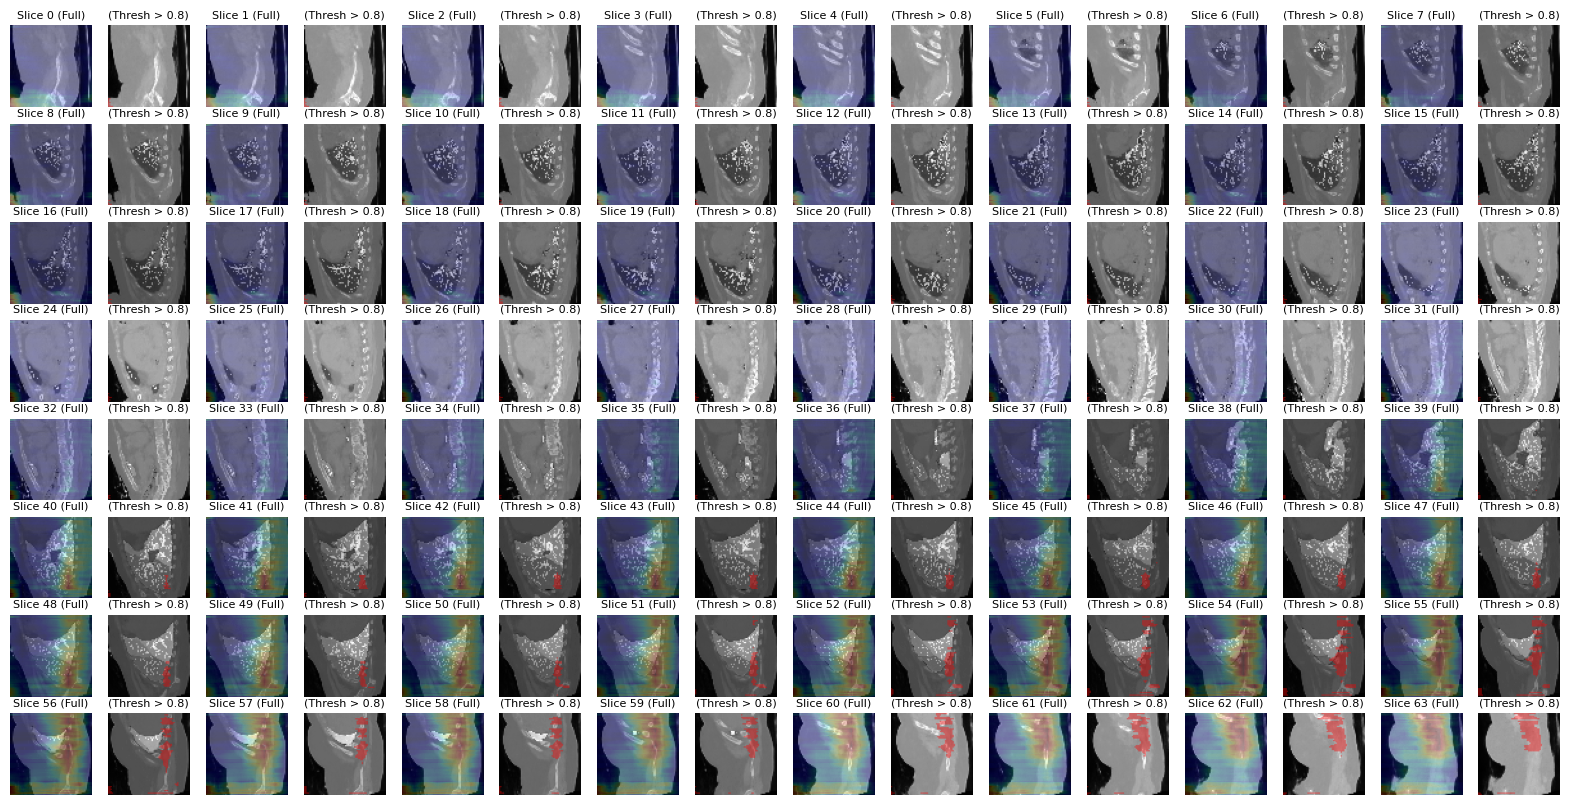

In [11]:
view = 'sagittal'

plt.figure(figsize=(15, 15))
plt.suptitle(f"Overlay of CLS Heatmaps - View: {view.capitalize()}", fontsize=16)
overlay_heatmap_on_slices(sample_norm_flipped, heatmap_volume_flipped, view=view, n_rows=8, n_cols=8, threshold=0.8)

In [1]:
from stage2 import run_diffusion_2
import accelerate
accelerate.state.AcceleratorState._shared_state.clear() # dirty hack to reset accelerator state

run_diffusion_2(input_folder="/media/volume/gen-ai-volume/MedSyn/results/img_64_standard", 
                output_folder="/media/volume/gen-ai-volume/MedSyn/results/img_256_standard", 
                model_folder="/media/volume/gen-ai-volume/MedSyn/models/stage2",
                filename="leftpleur_nocard_nocons.npy",
                num_series_exists=0)

/home/exouser/miniconda3/envs/medsyn-3-8/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/exouser/miniconda3/envs/medsyn-3-8/lib/python3.8/site-packages/rotary_embedding_torch/rotary_embedding_torch.py:35: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  @autocast(enabled = False)
/home/exouser/miniconda3/envs/medsyn-3-8/lib/python3.8/site-packages/rotary_embedding_torch/rotary_embedding_torch.py:254: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  @autocast(enabled = False)


Number of parameters: 54307908
Map Location: cuda
Model path: /media/volume/gen-ai-volume/MedSyn/models/stage2/1000_ckpt/pytorch_model.bin


/home/exouser/MedsynBackend/src/stage2.py:1110: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.model.load_state_dict(torch.load(model_path, map_location=map_location), s

found 1 videos as gif files at /media/volume/gen-ai-volume/MedSyn/results/img_64_standard
loading model...
Load accelerator state: /media/volume/gen-ai-volume/MedSyn/models/stage2/1000_ckpt


/home/exouser/miniconda3/envs/medsyn-3-8/lib/python3.8/site-packages/accelerate/checkpointing.py:242: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  states = torch.load(input

training model...
num_samples: 1
High Resolution: 100%|██████████| 21/21 [01:26<00:00,  4.10s/it]


In [3]:
from dicom_helpers import nifti_to_dicom
import os

FILES_FOLDER = "/media/volume/gen-ai-volume/MedSyn/results/"
foldername = "leftpleur_nocard_nocons"
filename = "leftpleur_nocard_nocons"
sample_number = "0"
num_series_exists = 0

nifti_file = os.path.join(FILES_FOLDER,"img_256_standard",filename+"_sample_" + str(num_series_exists) + ".nii.gz")
output_folder = os.path.join(FILES_FOLDER,"dicom",filename+"_sample_" + str(num_series_exists))

nifti_to_dicom(nifti_file=nifti_file,
                output_folder=output_folder,
                series_description="mild left pleural effusion, no cardiomegaly, no consolidation",                      
                series_instance_uid="00000022222",
                study_instance_uid="00000022222",
                patient_name="Mild left pleural effusion",
                patient_id="00000022222")

Store DICOM files in Folder: /media/volume/gen-ai-volume/MedSyn/results/dicom/leftpleur_nocard_nocons_sample_0


/home/exouser/miniconda3/envs/medsyn-3-8/lib/python3.8/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: '00000022222'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


Conversion complete. DICOM files are saved in /media/volume/gen-ai-volume/MedSyn/results/dicom/leftpleur_nocard_nocons_sample_0


In [12]:
def generate_pmap(heatmap_volume, threshold=0.5):
    """
    Convert a heatmap into a binary probability map (PMAP).
    
    Args:
        heatmap_volume (numpy.ndarray): The original heatmap volume (3D).
        threshold (float): The threshold to binarize the heatmap.

    Returns:
        numpy.ndarray: A binary probability map (same shape as heatmap_volume).
    """
    pmap = (heatmap_volume > threshold).astype(np.uint8)  # Convert to 0 and 1
    return pmap

pmap = generate_pmap(heatmap_volume, threshold=0.6)
print(f"PMAP shape: {pmap.shape}, Unique values: {np.unique(pmap)}")  # Should only contain 0 and 1

PMAP shape: (64, 64, 64), Unique values: [0 1]


In [13]:
import pydicom
import highdicom as hd
from datetime import datetime
from highdicom.pm import ParametricMap, RealWorldValueMapping
from pydicom.uid import generate_uid
from scipy.ndimage import zoom

def resize_pmap(pmap, target_shape):
    """
    Resize the probability map (PMAP) to match DICOM slice dimensions.

    Args:
        pmap (numpy.ndarray): Original PMAP (slices, height, width).
        target_shape (tuple): (num_slices, height, width) from DICOM.

    Returns:
        numpy.ndarray: Resized PMAP matching the DICOM shape.
    """
    zoom_factors = (target_shape[0] / pmap.shape[0],  # Adjust slices
                    target_shape[1] / pmap.shape[1],  # Adjust height
                    target_shape[2] / pmap.shape[2])  # Adjust width

    pmap_resized = zoom(pmap, zoom_factors, order=1)  # Bilinear interpolation
    return pmap_resized


def load_dicom_series(directory):
    """
    Load all DICOM slices from a directory and sort them by Instance Number.

    Args:
        directory (str): Path to the folder containing DICOM files.

    Returns:
        list[pydicom.Dataset]: Sorted list of DICOM datasets.
    """
    dicom_files = [os.path.join(directory, f) for f in os.listdir(directory) if f.endswith('.dcm')]
    dicom_datasets = [pydicom.dcmread(f) for f in dicom_files]

    # Sort slices by Instance Number to ensure correct order
    dicom_datasets.sort(key=lambda x: int(x.InstanceNumber))
    
    return dicom_datasets

def attach_pmap_to_dicom_series(dicom_dir, pmap, filename, sampleNum, series_description, typemap):
    """
    Attach a PMAP to a DICOM CT series and save it as a multi-frame DICOM PMAP.

    Args:
        dicom_dir (str): Path to the directory containing DICOM slices.
        pmap (numpy.ndarray): The PMAP array (same size as the DICOM volume).

    Returns:
        str: Path to the saved PMAP DICOM file.
    """
    # Load DICOM series
    dicom_series = load_dicom_series(dicom_dir)

    # Get DICOM shape
    num_slices = len(dicom_series)
    dicom_height, dicom_width = dicom_series[0].Rows, dicom_series[0].Columns

    # Resize PMAP if dimensions do not match
    if pmap.shape != (num_slices, dicom_height, dicom_width):
        print(f"Resizing PMAP from {pmap.shape} to ({num_slices}, {dicom_height}, {dicom_width})")
        pmap = resize_pmap(pmap, (num_slices, dicom_height, dicom_width))

    pmap = pmap.astype(np.float32)
    # ✅ Flip the PMAP if it appears upside down
    pmap = np.flip(pmap, axis=1)  # Flip along height (axial view)
    # pmap = np.flip(pmap, axis=0)  # Flip along depth (coronal view)
    # pmap = np.flip(pmap, axis=2)  # Flip along width (sagittal view)
    
    # Generate metadata
    series_instance_uid = generate_uid()
    instance_uid = generate_uid()
    now = datetime.now()

    # ✅ Get correct Referenced CT Series UID
    referenced_series_uid = dicom_series[0].SeriesInstanceUID

    # ✅ Fix: Ensure correct SOP Class UID for CT Image Storage
    referenced_instances = []
    for img in dicom_series:
        ref = pydicom.Dataset()
        ref.ReferencedSOPClassUID = "1.2.840.10008.5.1.4.1.1.2"  # ✅ CT Image Storage
        ref.ReferencedSOPInstanceUID = img.SOPInstanceUID
        referenced_instances.append(ref)

    # ✅ Define a valid RealWorldValueMapping (Identity Mapping)
    real_world_value_mappings = [
        RealWorldValueMapping(
            lut_label="Identity",
            lut_explanation="Probability Map (0-1 range)",
            unit=hd.sr.coding.Code("1", "UCUM", "No Units"),
            value_range=(0.0, 1.0),
            slope=1.0,
            intercept=0.0
        )
    ]

    # ✅ Fix: Ensure correct Modality (CT) and reference correct CT Series
    parametric_map = ParametricMap(
        source_images=dicom_series,  # Use full DICOM series
        pixel_array=pmap,  # Already resized
        series_instance_uid=series_instance_uid,
        sop_instance_uid=instance_uid,
        manufacturer="Your Organization",
        manufacturer_model_name="AI Model XYZ",
        software_versions="1.0.0",
        device_serial_number="0000",
        contains_recognizable_visual_features=False,
        real_world_value_mappings=real_world_value_mappings,  
        window_center=0.5,  # Helps display PMAP properly (0 to 1 range)
        window_width=1.0,  # Ensures PMAP contrast scaling works
        series_description=series_description,
        series_number=3005,  # ✅ Match expected PMAP series number in OHIF
        instance_number=1
    )

    # ✅ Explicitly set Modality to "CT"
    parametric_map.Modality = "CT"

    # ✅ Fix: Create Referenced Series Sequence Correctly
    referenced_series_item = pydicom.Dataset()
    referenced_series_item.SeriesInstanceUID = referenced_series_uid
    referenced_series_item.ReferencedInstanceSequence = referenced_instances
    parametric_map.ReferencedSeriesSequence = [referenced_series_item]

    
    # ✅ Update the Referenced Instance Sequence
    parametric_map.ReferencedImageSequence = referenced_instances

    # Save the PMAP as a DICOM file
    pmap_save_path = "/media/volume/gen-ai-volume/MedSyn/results/dicom_overlays"
    output_pmap_path = os.path.join(pmap_save_path, filename, f"{filename}_sample_{sampleNum}_output_{typemap}.dcm")
    os.makedirs(os.path.dirname(output_pmap_path), exist_ok=True)  
    parametric_map.save_as(output_pmap_path)

    print(f"Saved PMAP DICOM to {output_pmap_path}")
    return output_pmap_path


In [15]:
dicom_dir = "/media/volume/gen-ai-volume/MedSyn/results/dicom/leftpleur_nocard_nocons_sample_0"
pmap = generate_pmap(heatmap_volume, threshold=0.8)

# Attach PMAP to the DICOM CT scan series
output_pmap_dicom = attach_pmap_to_dicom_series(dicom_dir, heatmap_volume, "leftpleur_nocard_nocons", 0, "Saliency map", "heatmap")
output_pmap_dicom = attach_pmap_to_dicom_series(dicom_dir, pmap, "leftpleur_nocard_nocons", 0, "LNQ model probability heatmap", "pmap")


Resizing PMAP from (64, 64, 64) to (256, 256, 256)
Saved PMAP DICOM to /media/volume/gen-ai-volume/MedSyn/results/dicom_overlays/leftpleur_nocard_nocons/leftpleur_nocard_nocons_sample_0_output_heatmap.dcm
Resizing PMAP from (64, 64, 64) to (256, 256, 256)
Saved PMAP DICOM to /media/volume/gen-ai-volume/MedSyn/results/dicom_overlays/leftpleur_nocard_nocons/leftpleur_nocard_nocons_sample_0_output_pmap.dcm


In [52]:
import pydicom

pmap_path = "/media/volume/gen-ai-volume/MedSyn/results/dicom/aidan_kate_test_rightpleur_noleft_sample_0/slice_001.dcm"
ds = pydicom.dcmread(pmap_path)

print(f"SOP Class UID: {ds.SOPClassUID}")
print(f"Modality: {ds.Modality}")
print(f"Series Description: {ds.SeriesDescription}")
print(f"Referenced Series UID: {ds.get('ReferencedSeriesSequence', 'Not Found')}")


SOP Class UID: 1.2.840.10008.5.1.4.1.1.4
Modality: AI
Series Description: right pleural effusion and no left pleural effusion
Referenced Series UID: Not Found


In [61]:
import pydicom

pmap_path = "/media/volume/gen-ai-volume/MedSyn/results/dicom_overlays/aidan_kate_test_rightpleur_noleft/aidan_kate_test_rightpleur_noleft_sample_0_output_pmap.dcm"
ds = pydicom.dcmread(pmap_path)

print(f"SOP Class UID: {ds.SOPClassUID}")
print(f"Modality: {ds.Modality}")
print(f"Series Description: {ds.SeriesDescription}")
print(f"Referenced Series UID: {ds.get('ReferencedSeriesSequence', 'Not Found')}")


SOP Class UID: 1.2.840.10008.5.1.4.1.1.30
Modality: CT
Series Description: LNQ model probability heatmap
Referenced Series UID: [(0008, 114a)  Referenced Instance Sequence  256 item(s) ---- 
   (0008, 1150) Referenced SOP Class UID            UI: CT Image Storage
   (0008, 1155) Referenced SOP Instance UID         UI: 1.2.826.0.1.3680043.8.498.95919629491413303427326738332184371420
   ---------
   (0008, 1150) Referenced SOP Class UID            UI: CT Image Storage
   (0008, 1155) Referenced SOP Instance UID         UI: 1.2.826.0.1.3680043.8.498.56809248571505345124484213264574097299
   ---------
   (0008, 1150) Referenced SOP Class UID            UI: CT Image Storage
   (0008, 1155) Referenced SOP Instance UID         UI: 1.2.826.0.1.3680043.8.498.87009367460577368670815745729378428836
   ---------
   (0008, 1150) Referenced SOP Class UID            UI: CT Image Storage
   (0008, 1155) Referenced SOP Instance UID         UI: 1.2.826.0.1.3680043.8.498.105214068430276127699733137194859